# Based on the tutorial provided by Satyajit Pattnaik
### Breast Cancer Prediction | Implementing PCA & LDA | Machine Learning Project
[Refer tutotial here](https://www.youtube.com/watch?v=AL9-apISbPc&list=PLymcv5WXEpKjnWi7PMp2nul74TVXJ8q3E&index=4)


In [ ]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score


In [ ]:
# getting the data
dataset_url = "https://raw.githubusercontent.com/apogiatzis/breast-cancer-azure-ml-notebook/master/breast-cancer-data.csv"
dataset = pd.read_csv(dataset_url)

In [ ]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
dataset['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
# converting y-variable to 1,0
dataset['diagnosis'] = dataset['diagnosis'].map({'M':1, 'B':0})
#1-malignant: cancerous
#0-benign: non-cancerous

dataset.diagnosis.value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [ ]:
# randomly selecting few features
x=dataset.iloc[:,list(range(2,21))]
y=dataset.diagnosis.values

In [ ]:
print(x.head())
print(x.shape)

   radius_mean  texture_mean  ...  concave points_se  symmetry_se
0        17.99         10.38  ...            0.01587      0.03003
1        20.57         17.77  ...            0.01340      0.01389
2        19.69         21.25  ...            0.02058      0.02250
3        11.42         20.38  ...            0.01867      0.05963
4        20.29         14.34  ...            0.01885      0.01756

[5 rows x 19 columns]
(569, 19)


In [ ]:
# feature scaling (standardization) : z = (x - u) / s
# Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x))

In [ ]:
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002,1.316862,0.724026,0.660820,1.148757
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351,-0.692926,-0.440780,0.260162,-0.805450
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005,0.814974,0.213076,1.424827,0.237036
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702,2.744280,0.819518,1.115007,4.732680
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067,-0.048520,0.828471,1.144205,-0.361092


In [ ]:
# splitting into train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

#### Without using PCA/LDA

In [ ]:
# training using Logistic Regression Model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, solver='liblinear', n_jobs=-1)
classifier.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1539: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 2.
  " = {}.".format(effective_n_jobs(self.n_jobs)))


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=0,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [ ]:
# predicting data
y_pred = classifier.predict(x_test)
type(y_pred)

numpy.ndarray

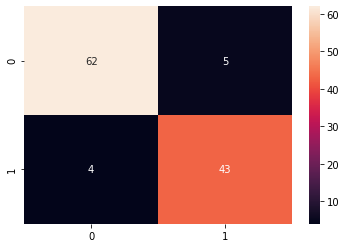

In [ ]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True) # annot = True, write the data value in each cell

In [ ]:
# printing the accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:{2}.{5}}")

Accuracy: 92.105


#### Implementing PCA

In [ ]:
# splitting into train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

In [ ]:
type(x_train)
type(y_train)
print(x_train.shape)

(455, 19)


In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 5) # reducing components to 5
# pca = PCA(0.9) - 90% variance
x_train = pd.DataFrame(pca.fit_transform(x_train))
x_test = pd.DataFrame(pca.transform(x_test))

In [ ]:
x_train.head()

,0,1,2,3,4
0,-2.236574,1.145658,0.978930,-0.702483,-0.617793
1,-1.826867,0.538067,0.957770,0.421206,-0.566398
2,-0.995264,-1.688676,-1.441071,-0.262069,0.454567
3,-1.245463,0.596044,0.246765,-0.799578,-0.214459
4,-2.730915,-1.172581,0.504356,0.618287,-0.590292


In [ ]:
print(pca.explained_variance_ratio_)
# pc1 > pc2 > pc3 > pc4 > pc5

[0.44399973 0.20321708 0.0887824  0.06619598 0.05250083]


In [ ]:
# training logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, solver='liblinear')
classifier.fit(x_train, y_train)

#predicting
y_pred = classifier.predict(x_test)

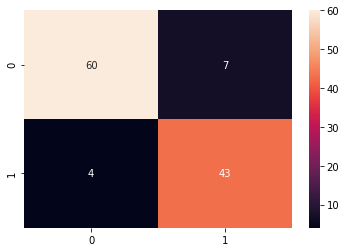

In [ ]:
# visualizing using confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True)

In [ ]:
print(f"Accuracy: {accuracy_score(y_pred, y_test)*100:{2}.{5}}")

Accuracy: 90.351


#### Implementing LDA

In [ ]:
# splitting into train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)
x_train.shape

(455, 19)

In [ ]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=5)
x_train = pd.DataFrame(lda.fit_transform(x_train, y_train)) #lda requires both x,y
x_test = pd.DataFrame(lda.transform(x_test))

/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(19, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


In [ ]:
x_test.head()

,0
0,1.435630
1,-0.281683
2,-1.062609
3,-0.898253
4,-1.398578


In [ ]:
x_train.head()

,0
0,-2.291591
1,-1.194648
2,-0.230595
3,-0.790567
4,-1.110191


In [ ]:
lda.explained_variance_ratio_

array([1.])

In [ ]:
# training a logistic regression model
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, solver='liblinear')
classifier.fit(x_train, y_train)

# predicting
y_pred = classifier.predict(x_test)

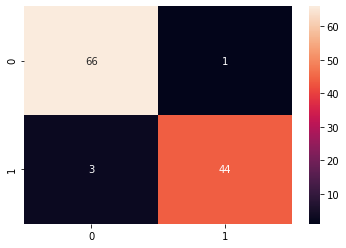

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

# visualization
sns.heatmap(cm, annot=True)

In [ ]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:{2}.{5}}")

Accuracy: 96.491


In [ ]:
# highest accuracy came using lda